# Import Libraries



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Reading input(.csv) file

In [3]:
# x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,x12 mandatory
df = pd.read_csv('Data_for_Model_Building.csv')
df.head()

,Date,Target,X1,X2,X3,X4,X5,X6,X7,X8,...,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83
0,1/12/2016,0.564444,95.977918,544.488372,0.0,34.447950,1.925049,0.0,2435.0,2.69,...,0.0,0.0,0.41,97.11,1.20,14.272000,11.554000,76.138410,13.519424,10.342166
1,2/12/2016,0.511111,102.212698,565.452870,0.0,26.666667,2.288288,0.0,2410.0,2.67,...,0.0,0.0,0.40,97.18,1.09,12.963333,13.246667,76.305411,13.463950,10.230639
2,3/12/2016,0.583000,102.301790,568.634761,0.0,27.909207,2.521893,0.0,2390.0,2.67,...,0.0,0.0,0.34,97.08,1.22,12.982500,16.942500,76.380209,13.360204,10.259587
3,4/12/2016,0.522500,100.868381,555.961235,0.0,29.561271,2.856751,0.0,2415.0,2.68,...,0.0,0.0,0.35,97.14,1.19,11.330000,19.874000,76.061273,13.589224,10.349503
4,5/12/2016,0.558000,113.027190,562.392589,0.0,23.625378,3.024157,0.0,2440.0,2.70,...,0.0,0.0,0.42,97.02,1.24,11.450000,19.177500,76.572835,13.092267,10.334898


# Dropping mandatory features
We are dropping mandatory features, and trying to do feature selection on rest of the features.

In [4]:
df1 = df.copy()
columns = ['X1','X2','X4','X5','X6','X7','X8','X9','X10','X11','X12','Date']
df1.drop(columns,inplace=True, axis=1)
df1.head()

,Target,X3,X13,X14,X15,X16,X17,X18,X19,X20,...,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83
0,0.564444,0.0,43.0,3.633333,1.092923,47.781842,3.74,64.21,2.00,2.48,...,0.0,0.0,0.41,97.11,1.20,14.272000,11.554000,76.138410,13.519424,10.342166
1,0.511111,0.0,45.0,3.516667,1.154786,46.418243,3.81,64.08,2.12,2.54,...,0.0,0.0,0.40,97.18,1.09,12.963333,13.246667,76.305411,13.463950,10.230639
2,0.583000,0.0,46.0,3.575000,1.249812,44.525480,4.14,64.28,1.81,2.64,...,0.0,0.0,0.34,97.08,1.22,12.982500,16.942500,76.380209,13.360204,10.259587
3,0.522500,0.0,45.0,3.628571,1.261871,44.223783,4.22,64.39,2.01,2.49,...,0.0,0.0,0.35,97.14,1.19,11.330000,19.874000,76.061273,13.589224,10.349503
4,0.558000,0.0,42.0,3.666667,1.295036,43.579970,4.02,64.12,2.02,2.48,...,0.0,0.0,0.42,97.02,1.24,11.450000,19.177500,76.572835,13.092267,10.334898


# Train Test Split
We are diving our dataset into 95 % training data and 5 % test data

In [5]:
#from numpy.random import RandomState
rng = RandomState()
train = df1.sample(frac=0.95, random_state=rng)
test = df1.loc[~df1.index.isin(train.index)]
#train.shape

In [6]:
# prepare for modeling
X_train = train.drop(['Target'], axis=1)
y_train = train['Target']
X_test = test.drop(['Target'], axis=1)


# Random Forest Regressor for feature selection

Although there are various methods other than Random Forest Regressor to find important feature like PCA etc. I chose Random Forest Regressor for feature selection

In [8]:
#from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)

model.fit(X_train,y_train)

/home/joseph/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

# Top 10 most important non mandatory features
Since there are  84 features, and also we have around 13 mandatory features, I decided to find top 10 non mandatory features for feature selection

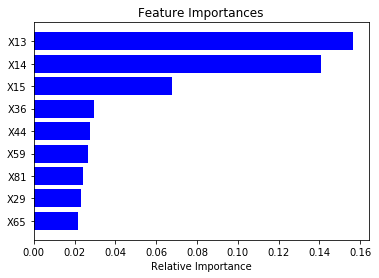

In [10]:
#import numpy as np
#import matplotlib.pyplot as plt
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Creating dataframe for analysing the important features
 Merging mandatory features with top 10 features with more relative importance. These are the 21 features I have considered in total for my modeling purpose

In [11]:


col_list = ['Target','X14','X13','X15','X36','X70','X29','X71','X64','X35','X1','X2','X4','X5','X6','X7','X8','X9','X10','X11','X12']
df = df[col_list]
df

,Target,X14,X13,X15,X36,X70,X29,X71,X64,X35,...,X2,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,0.564444,3.633333,43.00,1.092923,52.23,0.00,3.673333,0.00,23.99,15.311000,...,544.488372,34.447950,1.925049,0.000000,2435.0,2.69,1106.0,1.43,54,2230.0
1,0.511111,3.516667,45.00,1.154786,52.68,0.00,3.713333,0.00,21.37,15.421667,...,565.452870,26.666667,2.288288,0.000000,2410.0,2.67,1112.0,1.44,55,2240.0
2,0.583000,3.575000,46.00,1.249812,52.98,0.00,3.693333,0.00,21.37,15.360000,...,568.634761,27.909207,2.521893,0.000000,2390.0,2.67,1120.0,1.48,58,2210.0
3,0.522500,3.628571,45.00,1.261871,52.32,0.00,3.676667,0.00,21.37,15.149417,...,555.961235,29.561271,2.856751,0.000000,2415.0,2.68,1117.0,1.49,56,2270.0
4,0.558000,3.666667,42.00,1.295036,52.37,0.00,3.673333,0.00,21.37,15.283250,...,562.392589,23.625378,3.024157,0.000000,2440.0,2.70,1115.0,1.50,56,2280.0
5,0.600000,3.550000,43.00,1.307415,51.88,0.00,3.810000,0.00,21.37,15.294833,...,559.329438,22.507645,3.010777,0.000000,2445.0,2.72,1122.0,1.50,54,2240.0
6,0.456250,3.600000,42.00,1.298264,51.71,0.00,3.903333,0.00,21.37,15.374250,...,558.196597,22.222222,3.027231,0.000000,2422.0,2.72,1117.0,1.50,59,2250.0
7,0.524286,3.683333,39.00,1.363821,51.98,0.00,3.806667,0.00,21.37,15.264250,...,564.005388,39.548193,3.012570,0.857339,2430.0,2.63,1112.0,1.32,59,2230.0
8,0.593000,3.683333,42.00,1.301713,51.56,0.00,3.836667,0.00,21.37,15.429833,...,564.406163,23.714286,2.918496,0.316966,2410.0,2.70,1120.0,1.40,60,2240.0
9,0.437000,3.683333,47.00,1.252256,53.11,0.00,3.920000,0.00,21.37,14.983667,...,541.166770,17.738095,2.981525,0.000000,2423.0,2.73,1111.0,1.39,59,2230.0


# Finding correlation of features with the target
 Here we see the top 10 most correlated features, but since feature X81 has highest correlation of 0.249 we cannot drop any features.


In [12]:

corr_matrix = train.corr().abs()

print(corr_matrix['Target'].sort_values(ascending=False).head(10))

Target    1.000000
X81       0.249937
X13       0.215416
X15       0.203831
X47       0.197758
X14       0.192206
X83       0.176007
X70       0.175824
X3        0.174366
X54       0.171237
Name: Target, dtype: float64


# Preparing the data for modelling

We are seperating our train and test dataset into X and y with X containing the feature columns and y are our target values.

In [13]:
#from numpy.random import RandomState
rng = RandomState()
train_r = df.sample(frac=0.95, random_state=rng)
test_r = df.loc[~df1.index.isin(train.index)]
# prepare for modeling
X_train = train_r.drop(['Target'], axis=1)
y_train = train_r['Target']
X_test = test_r.drop(['Target'], axis=1)
y_test = test_r['Target']
#train.shape

# Random search with cross validation
We are creating the feature for Rando search where we are trying to find the most suitable features for Random Forest model. This is hyperparameter tuning technique.

In [14]:


#from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Random grid to search for best hyperparameters

In [15]:

# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=2)

# Best parameters using random search

In [16]:

rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

# Creating a function for model evaluation 
Accuracy and R2 are the evaluation parameters
Visualizing the results (comparing test data with predicted data)

In [17]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions -  y_test)
    # mape is the mean absolute error
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    r2 = r2_score(y_test, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('R2 score: ', r2)
    #visualize results
    plt.scatter(y_test,predictions)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')

# Evaluate default model
At first we are evaluating our base line model i.e. the model with out any hyperparameter tuning. The accuracy value is quite good around 97 %

Model Performance
Average Error: 0.0150 degrees.
Accuracy = 97.07%.
R2 score:  0.9459051875595081


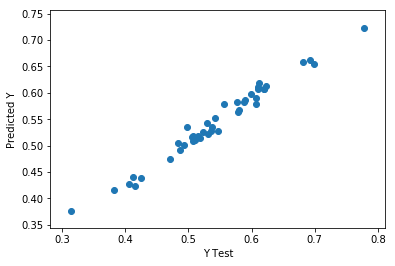

In [18]:

base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(X_train, y_train)
evaluate(base_model, X_test, y_test)

In [87]:
# Model saving Random Forest
#import cloudpickle
#ouf = open('model_RF_baseline.txt', 'wb')
#cloudpickle.dump(base_model, ouf)
#cloudpickle.dump(range(19), ouf)
#ouf.close(  )

# Evaluating random search model
With Hyperparameter tuning the accuracy has furhter improved to 99.7 %

Model Performance
Average Error: 0.0007 degrees.
Accuracy = 99.85%.
R2 score:  0.9971394364615564


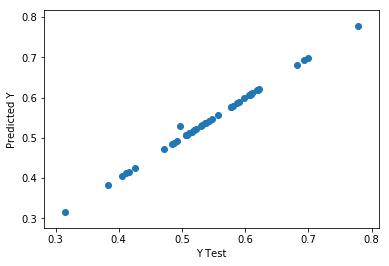

In [19]:

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

# Evaluating the Linear Regression Model
The accuracy and R2 score is quite low compared to the random forest model.R2 gives indication of goodness of fit of the model. R2 of 1 determines perfect fit. Since R2 for Linear Regression is around 40%, I conclude 
that features and outcome does not have good linear relationship.  This model could be furhter tuned using hyperparameter tuning, I sincerely apologize for not completing this part. 

Model Performance
Average Error: 0.0518 degrees.
Accuracy = 89.48%.
R2 score:  0.43915467319722334


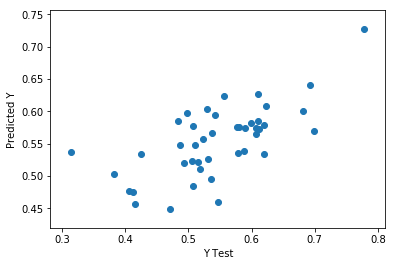

In [20]:

base_model1 = LinearRegression()
base_model1.fit(X_train, y_train)
evaluate(base_model1, X_test, y_test)



 
# Saving the models used and loading those model for unseen data



# Random Forest- Baseline Model

In [21]:
from sklearn.externals import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(base_model, filename)



 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9459051875595083


# Random Forest- Random Search Model

In [22]:
# save the model to disk
filename = 'finalized_model_random search.sav'
joblib.dump(best_random, filename)



 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9971394364615564


# Linear Regression

In [24]:
# save the model to disk
filename = 'finalized_linear regression.sav'
joblib.dump(base_model1, filename)



 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)


# Conclusion
Since, I have got high accuracies with the random forest model, I have not tried other regression models such as support vector regressor. This work could have been more exciting if I considered all the features without feature selection and comparing the results with feature selection. Also, I should have used artificial neural network, where I could have worked with all the features.